# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
# def is_shattered(d, n, S_n):
    
#     for y in different assigment of classes to points in S_n:
#         check if they are linearly separable
#         i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
#
#     if for at least for one y the answer is no, then return False, else return True
#     return True/False

In [3]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product

In [4]:
import numpy as np
from sklearn.svm import SVC

def is_shattered(S_n):
    for combs in product([0, 1], repeat=S_n.shape[0]):
        combs = np.array(combs)
        if sum(combs) == 0 or sum(combs) == S_n.shape[0]:
            continue
        svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        svc.fit(S_n, combs)
        if (svc.predict(S_n) != combs).any():
            return False
    return True

### c)

In [5]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

In [6]:
import matplotlib.pyplot as plt

def plot_shattered(S_n):
    for combs in itertools.product([0, 1], repeat=S_n.shape[0]):
        combs = np.array(combs)
        if sum(combs) == 0 or sum(combs) == S_n.shape[0]:
            print('Linearly separable')
            plt.figure(figsize=(6,3))
            plt.subplot(1,2,1)
            plt.title('Original classes')
            plt.scatter(S_n[:,0], S_n[:,1], c=combs)
            plt.subplot(1,2,2)
            plt.title('Predicted classes')
            plt.scatter(S_n[:,0], S_n[:,1], c=combs)
            plt.show()
            print("-----------------------------")
            continue
        svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        svc.fit(S_n, combs)
        pred = svc.predict(S_n)
        if (pred != combs).any():
            print('Not linearly separable')
        else:
            print('Linearly separable')
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plt.title('Original classes')
        plt.scatter(S_n[:,0], S_n[:,1], c=combs)
        plt.subplot(1,2,2)
        plt.title('Predicted classes')
        plt.scatter(S_n[:,0], S_n[:,1], c=pred)
        plt.show()
        print("-----------------------------")

Linearly separable


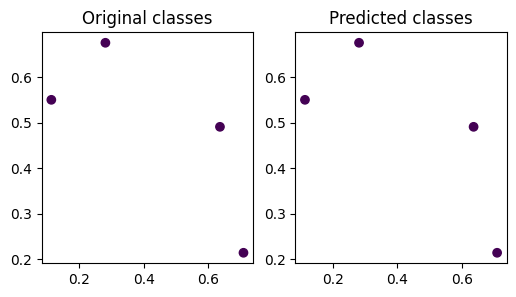

-----------------------------
Linearly separable


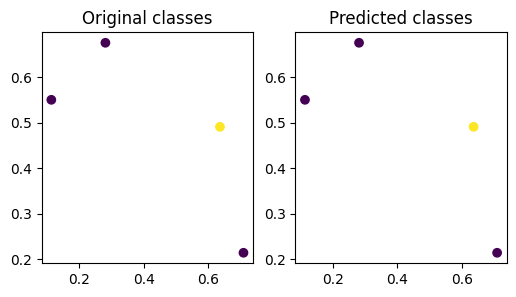

-----------------------------
Linearly separable


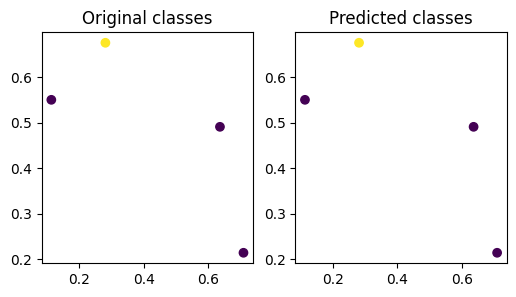

-----------------------------
Linearly separable


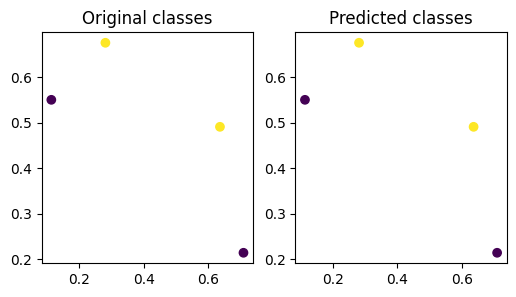

-----------------------------
Linearly separable


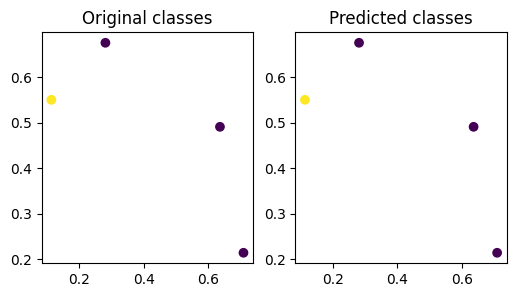

-----------------------------
Not linearly separable


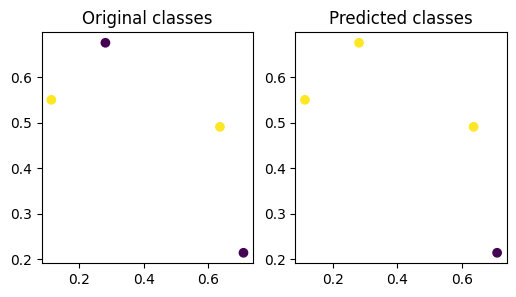

-----------------------------
Linearly separable


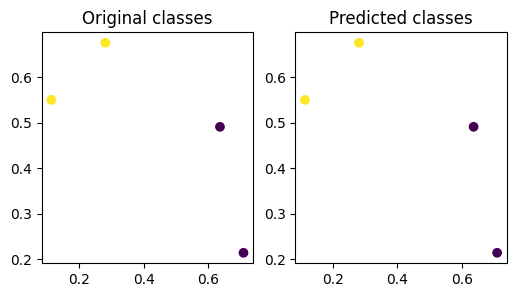

-----------------------------
Linearly separable


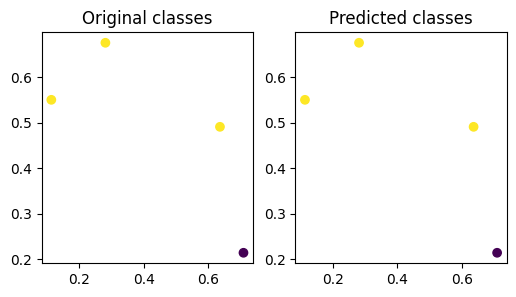

-----------------------------
Linearly separable


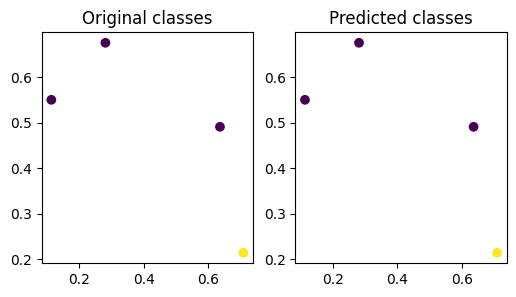

-----------------------------
Linearly separable


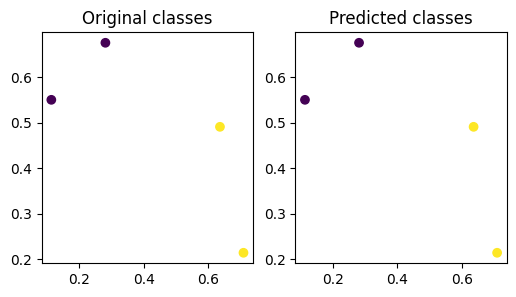

-----------------------------
Not linearly separable


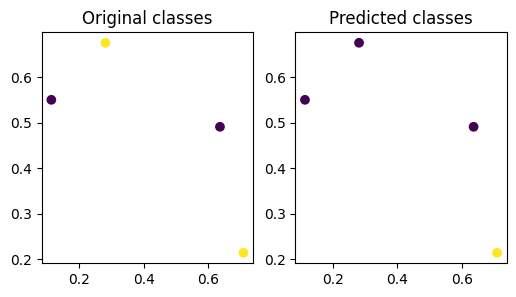

-----------------------------
Linearly separable


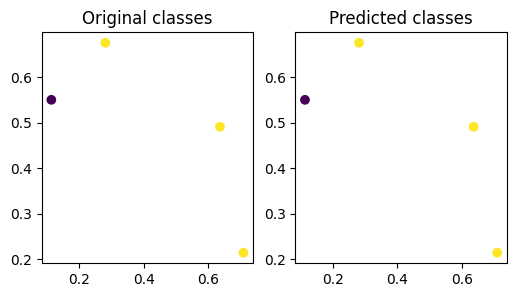

-----------------------------
Linearly separable


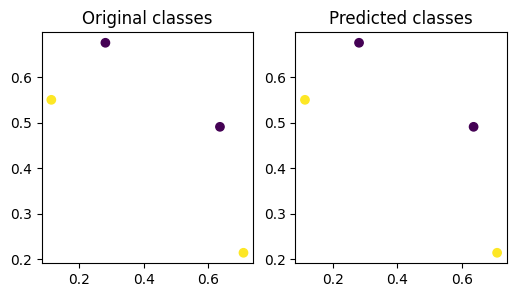

-----------------------------
Linearly separable


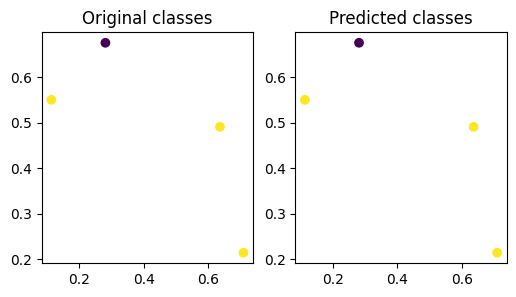

-----------------------------
Linearly separable


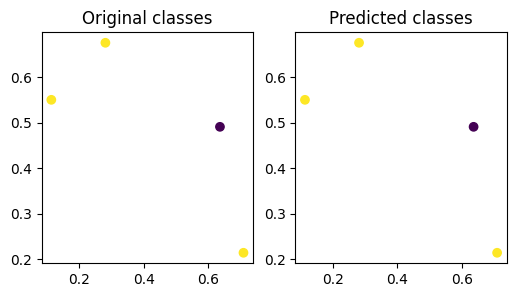

-----------------------------
Linearly separable


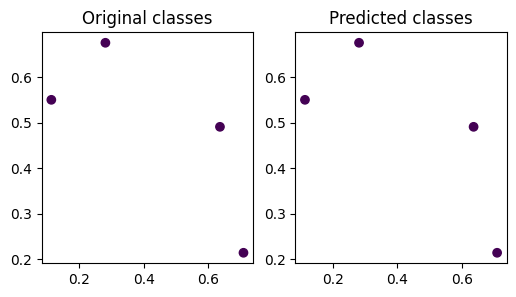

-----------------------------


In [7]:
S_n = np.random.rand(4, 2)

plot_shattered(S_n)

### d)

In [8]:
# code
vc = []

for d in range(2, 11):
    print(f'D: {d}')
    ns = np.arange(1, 13)
    shatterings = []
    for i in range(len(ns)):
        n = ns[i]
        S_ns = np.random.rand(50, n, d)
        shattering = (1*np.array([is_shattered(S_n) for S_n in S_ns])).sum()
        shatterings.append(shattering)
        if shattering == 0:
            vc.append(i+1)
            break
    print(shatterings)


D: 2
[50, 50, 49, 0]
D: 3
[50, 50, 50, 47, 0]
D: 4
[50, 50, 50, 50, 47, 0]
D: 5
[50, 50, 50, 50, 50, 49, 0]
D: 6
[50, 50, 50, 50, 50, 49, 45, 0]
D: 7
[50, 50, 50, 50, 50, 50, 50, 44, 0]
D: 8
[50, 50, 50, 50, 50, 50, 50, 50, 45, 0]
D: 9
[50, 50, 50, 50, 50, 50, 50, 50, 50, 42, 0]
D: 10
[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 43, 0]


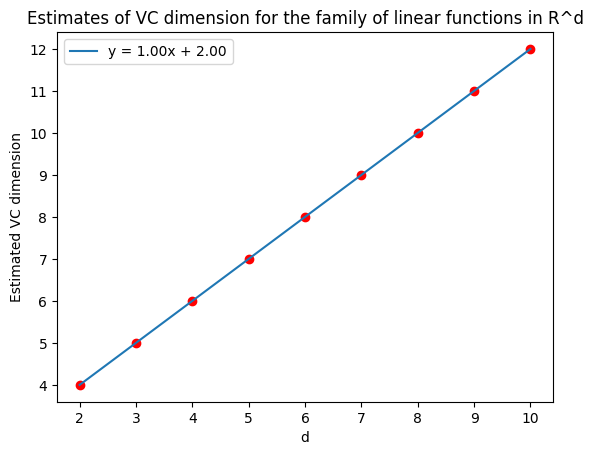

In [11]:
x_vals = np.arange(2, 11)
y_vals = vc

coefs = np.polyfit(x_vals, y_vals, 1)
a, b = coefs

plt.plot(x_vals, y_vals, label=f'y = {a:.2f}x + {b:.2f}')
plt.scatter(x_vals, y_vals, color='red')
plt.title('Estimates of VC dimension for the family of linear functions in R^d')
plt.xlabel('d')
plt.ylabel('Estimated VC dimension')
plt.legend()
plt.show()

### e)

In [ ]:
# A hint: change a kernel in SVM